In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
import re

df = pd.read_csv('berkeley_2019_sampled.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tian\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [13]:
def assign_sentiment(row):
    sentiments = {
        'positive': row['emo_pred_pos'],
        'negative': row['emo_pred_neg'],
        'neutral': row['emo_pred_neu'],
    }
    return max(sentiments, key=sentiments.get)

df['sentiment_label'] = df.apply(assign_sentiment, axis=1)
df

,Unnamed: 0,body,emo_pred_pos,emo_pred_neu,emo_pred_neg,sentiment_label
0,0,They tried to cut my catalytic converter off w...,0.3639,0.4793,0.1568,neutral
1,1,With extremely expensive minerals inside.,0.0153,0.2908,0.6939,negative
2,2,"Not gonna lie, I had to google what a Catalyti...",0.1438,0.6108,0.2454,neutral
3,3,I never have figured out why some cross-listed...,0.1038,0.5491,0.3472,neutral
4,4,Yes it’s possible but most EE/CS TA’s are not ...,0.0513,0.5154,0.4333,neutral
...,...,...,...,...,...,...
28394,28394,You cannot use the swap feature for discussion...,0.0227,0.3030,0.6743,negative
28395,28395,phase 1 ended so you need to wait for your pha...,0.0420,0.6904,0.2676,neutral
28396,28396,They try to look at your performance relative ...,0.1984,0.6447,0.1569,neutral
28397,28397,Reserve a room in mainstacks?,0.0444,0.9044,0.0512,neutral


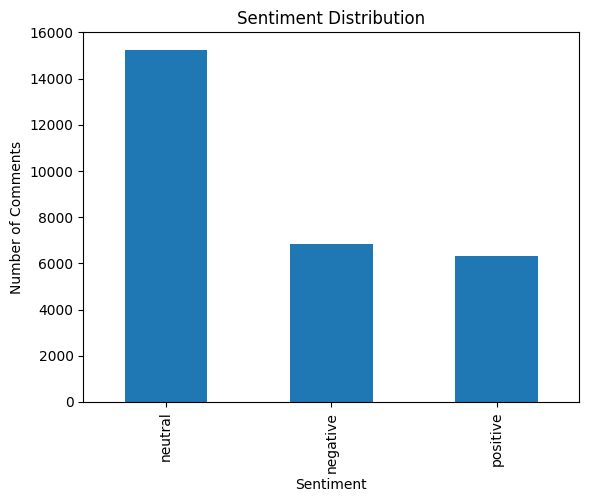

In [14]:
df['sentiment_label'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

In [15]:
stop_words = set(stopwords.words('english'))
def get_words(text):
    words = re.findall(r'\b\w+\b', str(text).lower())
    return [word for word in words if word not in stop_words]

pos_words = Counter()
neg_words = Counter()


for _, row in df.iterrows():
    words = get_words(row['body'])
    if row['sentiment_label'] == 'positive':
        pos_words.update(words)
    elif row['sentiment_label'] == 'negative':
        neg_words.update(words)

print("Top 10 Positive Words:", pos_words.most_common(10))
print("Top 10 Negative Words:", neg_words.most_common(10))

Top 10 Positive Words: [('good', 1063), ('get', 977), ('like', 934), ('also', 800), ('really', 756), ('class', 746), ('people', 720), ('go', 698), ('time', 671), ('one', 652)]
Top 10 Negative Words: [('people', 1450), ('like', 1345), ('get', 1071), ('would', 801), ('berkeley', 801), ('think', 744), ('one', 704), ('even', 636), ('know', 635), ('time', 630)]
